# Probability Density Functions Lab

## Problem Statement

In this lab, we'll learn how to use Probability Density Functions (PDFs) to explore our data set.  We'll also dive deep into calculating the mean, median, mode, and trimmed mean, and explore how each are influenced by outliers.  

### Objectives
* Compare and constrast the following Measures of Center: 
    * Mean
    * Median
    * Mode
    * Trimmed Mean
* Demonstrate the effect outlier values has on each
* Calculate each Measure of Center manually 
* Use numpy to calculate each Measure of Center

Run the cell below to import everything we'll need for this lab. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set a seed for reproducibility--don't change it, or you'll break things!
np.random.seed(0)

We'll start by creating a synthetic dataset to work with.  This dataset will be normally distributed.   

In the cell below:

**1.** Use numpy's [`random.normal()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function to create a data set of `size=100`.    
<br>
**2.** Then, append the value `1.2` to our `data` array 5 times (we'll need this so that we can calculate a _mode_ later on).  Use the `np.append()` method and pass in the `data` variable, as well as an array containing `[1.2, 1.2, 1.2, 1.2, 1.2]`.  If you have trouble, take a look at the [documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.append.html) for that method.  
<br>
**3.** Finally, use Seaborn's `sns.distplot()` method to visualize the probability density of this dataset.  

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


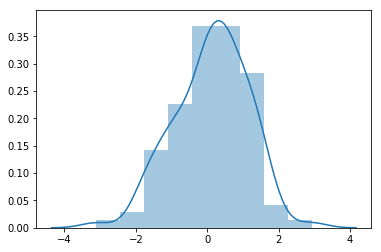

In [22]:
dataset = np.random.normal(size = 100)
dataset = np.append(dataset, [1.2, 1.2, 1.2, 1.2, 1.2])
sns.distplot(dataset, bins = 9)

Great.  We'll want to plot it to make it visual, but before we can do that, we'll need to calculate some basic metrics such as the sample's **_mean_** and **_standard deviation_**. 

In the cell below, write a function that takes in `data` and returns the mean.

Recall that the formula for the mean is: 

<center><img src='mean_formula.gif'></center>

where:


$\large \bar{x} = Sample\ Mean$

$\large N = Length\ of\ Dataset$

In the cell below, write a function that takes in an array of numbers and returns the mean of the data.  

Then, test that it works by using it on the `data` variable that we created above!

In [24]:
def get_mean(data):
    return sum(data) / len(data)

test1 = [5, 10, 15]
test2 = [1, 2, 3]
print(get_mean(test1)) # 10.0
print(get_mean(test2)) # 2.0
print(get_mean(dataset)) # 0.11410287193760468

10.0
2.0
0.11756848761733427


Great! Now that we have the mean, we just need to calculate the standard deviation. Our next lab is all about standard deviation and variance, so we'll leave the manual calculations for that lab and just use numpy for this one. 

Use the correct numpy function to calculate the standard deviation of `data` in the cell below. 

In [27]:
std = np.std(dataset)
std

1.0181528040655359

**Expected Output:** Standard Deviation: 1.01312

We'll go deeper into Standard Deviation and Variance in a later lab.  For now, it's just good to see what it is--we should never consider a mean value of a sample without also taking a look at the standard deviation!

### Calculating the Median

The median is the value directly in the middle of the a dataset--in statistical terms, this is the median quartile. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.  

If the dataset has an odd number of values, then the median is the middle number.   

If the datasaet has an even number of values, then we take the mean of the middle two numbers. 

In the cell below, write a function that takes in an array of numbers and returns the median value for that dataset.  

In [29]:
def get_median(data):
    return np.median(data)

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_median(test1)) # 3
print(get_median(test2)) # 2.5
print(get_median(dataset)) # 0.12898291075741067

3.0
2.5
0.21035936662981292


### Calculating the Mode

The mode is the value that shows up the most in a dataset.  A dataset can have 0 or more modes.  If no value shows up more than once, the dataset is considered to have no mode value.  If two numbers show up the same number of times, that dataset is considered **_bimodal_**.  Datasets where multiple values all show up the same number of times are considered **_multimodal_**.

In the cell below, write a function that takes in an array of numbers and returns another array containing the mode value(s).  

**_Hint_**: Building a histogram (also called a frequency distribution) with a dictionary is probably the easiest way to approach this problem!

In [32]:
import scipy
from scipy import stats
def get_mode(data):
    return scipy.stats.mode(data)

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_mode(test1)) # [5]
print(get_mode(test2)) # [1, 5]
print(get_mode(dataset)) # [1.2]

ModeResult(mode=array([5]), count=array([2]))
ModeResult(mode=array([1]), count=array([3]))
ModeResult(mode=array([1.2]), count=array([5]))


### How Outliers Affect Mean, Median, and Mode

The dataset that we created for this lab is fairly normally distributed, and doesn't contain any outliers. However, in the real world, we rarely have the luxury of working with outlier-free datasets.  In the cell below, we're going to write a function that helps us measure how much the mean, median, and mode are affected by outlier values.  

Write a function that takes in an array of numbers and an outlier value.  This function should calculate the mean, median, and mode values for the dataset, add the outlier to the dataset, and then recalculate the mean, median and mode values.  This function should return the amount the mean, median, and mode values were skewed by the outlier value (in that order).

**_Bonus_**: In the function, after adding in our outlier value, visualize the new distribution of the data as we did up above so we can see how the outlier has skewed the distribution.  

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Effect outlier had on mean: 0.18757010860738363
Effect outlier had on median: 0.006249478236836914
Effect outlier had on mode: [0.]


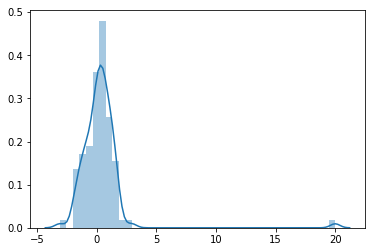

In [34]:
def check_outlier_effect(data, outlier):
    mean_val = get_mean(data)
    median_val = get_median(data) 
    mode_val = get_mode(data)[0]
    
    data = list(data)
    data.append(outlier)
    
    skewed_mean = get_mean(data)
    skewed_median = get_median(data)
    skewed_mode = get_mode(data)[0]
    
    mean_effect = abs(mean_val - skewed_mean)
    median_effect = abs(median_val - skewed_median)
    mode_effect = abs(mode_val - skewed_mode)
    
    sns.distplot(data)
    return mean_effect, median_effect, mode_effect

mean_effect, median_effect, mode_effect = check_outlier_effect(dataset, 20)
print("Effect outlier had on mean: {}".format(mean_effect))
print("Effect outlier had on median: {}".format(median_effect))
print("Effect outlier had on mode: {}".format(mode_effect))

**_Expected Output:_**

```Effect outlier had on mean: 0.1876028030949283
Effect outlier had on median: 0.007530330201733659
Effect outlier had on mode: 0.0```

As we can see from the output:

* The mean is heavily influenced by outliers.
* The median is only slightly influenced by outliers.
* The mode is not influenced by outliers at all!

### Dealing with Outliers: Calculating the Trimmed Mean

One way to make use of the mean while protecting from outliers it to calculate the **_Trimmed Mean_**.  The trimmed mean avoids being influenced by outlier values by cutting off pre-set amounts from the low and high ends of the data distribution.  For instance, if we wanted to calculate the Trimmed mean of 5%, we would drop the 5% lowest values and 5% highest values, and then calculate the mean of the remaining data.  This is a great way to protect ourselves from outlier values when we need to make use of the mean on datasets that contain many outliers.  Note that the `trim` value is a parameter we can choose--if our dataset is particularly noisy, we may choose to trim 10% or 15%.  

In the cell below, write a function that takes in an array of data and calculates the trimmed mean, with a default value of 5%. 

In [ ]:
def get_trimmed_mean(data, trim=.05):
    return(get_mean(data)

trimmed_mean_test = [-10, 1, 1, 2, 3, 4, 5, 5, 6, 20] # trim = .10
print(get_trimmed_mean(trimmed_mean_test, .10)) # 3.375
print(get_trimmed_mean(data)) # -0.013374707098353195

### Conclusion
In this lab, we learned:
* How to calculate the mean, and how it is used
* How to calculate the median, and how it is used
* How to calculate the mode, and how it is used
* How to calculate the trimmed mean, and why it is more resistant to outliers  